In [1]:
import pandas as pd

In [2]:
df = pd.read_json("./Musical_instruments_meta_2.json")

In [3]:
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[[Musical Instruments]],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,Vivaldi's famous set of four violin concertos ...
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[[Musical Instruments]],NaN,NaN,444 pages. \nReprint of corrected and revised ...
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN


En primer lloc miro:

    a. Quants productes tenen descripció
    b. D'aquests, quants tenen més de 3 frases.
    c. Quina és la longitud mitja d'aquestes frases
    
Pensant en [aquest paper](https://arxiv.org/abs/2003.13138)

In [4]:
non_nan_count = df['description'].count()
print("Hi ha", non_nan_count, "files amb descripció, que es un", non_nan_count/df.shape[0]*100, "%")

Hi ha 78629 files amb descripció, que es un 92.61257229007903 %


In [5]:
df['num_sentences_descr'] = df['description'].str.count('\.') + 1
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN,NaN
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[[Musical Instruments]],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[[Musical Instruments]],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN,NaN


In [6]:
three_or_more = (df['num_sentences_descr'] >= 3).sum()
print("Hi ha", three_or_more, "files amb descripcions de 3 o més frases, que es un", three_or_more/df.shape[0]*100, "%")

Hi ha 51295 files amb descripcions de 3 o més frases, que es un 60.41742735656824 %


In [7]:
avg_length = df["num_sentences_descr"].mean()
print("Les descripcions, quan existeixen, tenen de mitja una longitud de", avg_length, "frases (separades per .).")

Les descripcions, quan existeixen, tenen de mitja una longitud de 5.232865736560302 frases (separades per .).


Concateno, quan existeix, títol, marca i categoríes.

In [8]:
df['categories'] = df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['categories_str'] = df['categories'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr,categories_str
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G..."
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[Musical Instruments],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0,Musical Instruments
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0,"Musical Instruments, Instrument Accessories, G..."
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[Musical Instruments],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0,Musical Instruments
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G..."


In [9]:
df['combined_text'] = df.apply(
    lambda row: (
       ( str(row['brand']) + '. ' if not pd.isna(row['brand']) else '') +
        ( str(row['title']) +'. ' if not pd.isna(row['title']) else '') +
    ( str(row['categories_str']) + '. ' if not pd.isna(row['categories_str']) else '') +
    str(row['description'])),
    axis=1
)
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr,categories_str,combined_text
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G...","Six Sonatas For Two Flutes Or Violins, Volume ..."
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[Musical Instruments],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0,Musical Instruments,. Double Concerto in D Minor By Johann Sebasti...
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0,"Musical Instruments, Instrument Accessories, G...",Hal Leonard Vivaldi Four Seasons for Piano (Or...
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[Musical Instruments],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0,Musical Instruments,"Aida: Opera in Quattro Atti, Partitura -- Aida..."
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G...","Nocturnes. Musical Instruments, Instrument Acc..."


Igual que abans

In [10]:
non_nan_count = df['combined_text'].count()
print("Hi ha", non_nan_count, "files amb combined_text, que es un", non_nan_count/df.shape[0]*100, "%")
df['num_sentences_descr'] = df['combined_text'].str.count('\.') + 1
df.head()
three_or_more = (df['num_sentences_descr'] >= 3).sum()
print("Hi ha", three_or_more, "files amb combined_text de 3 o més frases, que es un", three_or_more/df.shape[0]*100, "%")
avg_length = df["num_sentences_descr"].mean()
print("Les combined_text, quan existeixen, tenen de mitja una longitud de", avg_length, "frases (separades per .).")

Hi ha 84901 files amb combined_text, que es un 100.0 %
Hi ha 80753 files amb combined_text de 3 o més frases, que es un 95.11430960766069 %
Les combined_text, quan existeixen, tenen de mitja una longitud de 7.29825325967892 frases (separades per .).


Aquí comenca el TDA; seguint els PAPERS

a. [TOPOLOGICAL DATA ANALYSIS IN TEXT CLASSIFICATION:
EXTRACTING FEATURES WITH ADDITIVE INFORMATION](https://arxiv.org/pdf/2003.13138.pdf)
* APPROACH 1: Topological features from word embeddings

Our method of extracting topological features from embeddings is described in Algorithm 1. Assume that a document
with T tokens is represented in D-dimensional word embedding by ΨT ×D

Per tant entenc que això seria després de fer algo tipo BERT a cada una de les T paraules per transformar-les en un vector de D dimensions, no thank you això va després

* APPROACH 2: Topological features de TF-IDF space

We divide each document into 10 consecutive blocks of equal size, we calculate TF-IDF vector for each block. We
chose 10, but one may try different number of blocks for each document. However, we note that using a large number
of blocks could make the TF-IDF vectors too sparse, so that comparing them would not be useful. For instance, if an
average number of tokens in a document is only 200 tokens and we divide each of the documents into 100 blocks, there
would be two tokens in each block, and most of the blocks would have zero similarity

In our experiments, we work on graphs of 10 vertices, where each vertex is represented by its TF-IDF vector

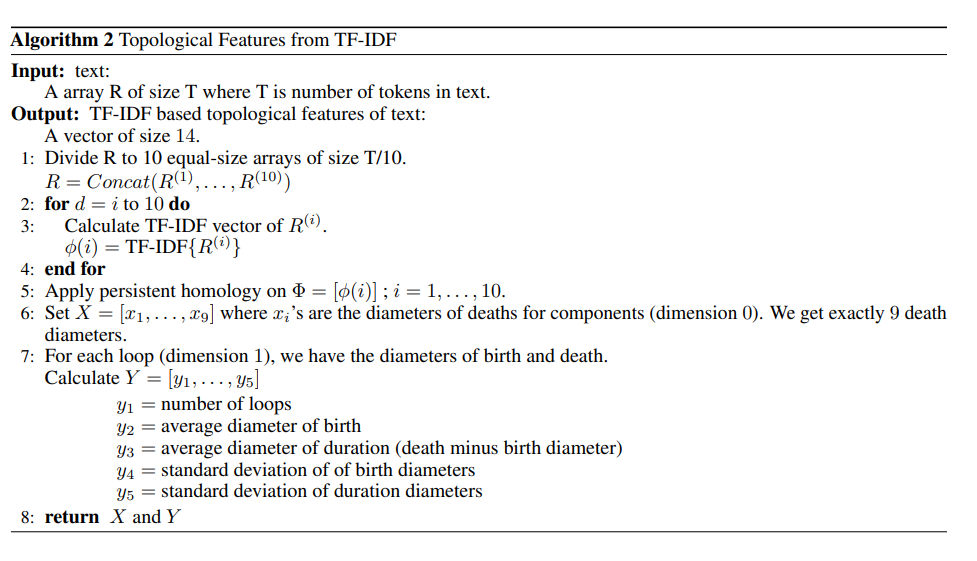

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

def calculate_tfidf(text):
    # Convert to lowercase
    text_lower = text.lower()

    # Remove non-word characters (keep only letters and numbers)
    text_cleaned = re.sub(r'\W', ' ', text_lower)
    
    # Step 1: Divide text into 10 equal-size arrays
    paraules = text_lower.split()
    T = len(paraules)
    
    n_blocks = 5
    
    chunks = []
    res = T%n_blocks
    chunk_size_a = T // n_blocks + 1 #arbitrariament trio que els primers siguin llargs
    a = []
    for i in range(0, res * chunk_size_a, chunk_size_a):
        a.append(" ".join(paraules[i:i + chunk_size_a]))
    chunk_size_b = T // n_blocks
    b = [" ".join(paraules[i:i + chunk_size_b]) for i in range(res * chunk_size_a, T, chunk_size_b)]
    chunks = a+b
    
    print(chunks)
    
    # Step 2-4: Calculate TF-IDF vectors for each chunk
    tfidf_vectorizer = TfidfVectorizer()
    aux = tfidf_vectorizer.fit_transform(chunks).toarray()
    
    return(np.asarray(aux))
    

# Example usage:
text = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Replace this with your actual array R

calculate_tfidf("a ba bb a b a")


['a ba', 'bb', 'a', 'b', 'a']


array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [12]:
print(df.loc[0,"combined_text"])
print(calculate_tfidf(df.loc[0,"combined_text"]))

Six Sonatas For Two Flutes Or Violins, Volume 2 (#4-6). Musical Instruments, Instrument Accessories, General Accessories, Sheet Music Folders. nan
['six sonatas for two', 'flutes or violins, volume', '2 (#4-6). musical instruments,', 'instrument accessories, general accessories,', 'sheet music folders. nan']
[[0.         0.         0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.5        0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.5        0.
  0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.81649658 0.         0.         0.         0.40824829 0.40824829
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

In [13]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(42)  # Create a random number generator

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import coo_matrix

from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence

from igraph import Graph

from IPython.display import SVG, display

import torch


import gudhi as gd

import gudhi.representations
import matplotlib.pyplot as plt

b. [USING TOPOLOGICAL DATA ANALYSIS FOR TEXT CLASSIFICATION](https://www.proquest.com/openview/6b7a6c694a0ded3edf2f6577b9ff4794/1?pq-origsite=gscholar&cbl=18750)

# Word2Vec

In [14]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

# Reads ‘alice.txt’ file
sample = open("alice.txt","r",encoding='utf-8')
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []
	
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							vector_size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ",
	model1.wv.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ",
	model1.wv.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
											window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ",
	model2.wv.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ",
	model2.wv.similarity('alice', 'machines'))


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9806748
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9754948
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.6124693
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.7649323


In [15]:
model2.wv.vectors

array([[-0.00407891,  0.14650804,  0.15383956, ...,  0.04121608,
        -0.00982653, -0.00385221],
       [-0.12298068,  0.23801416,  0.21683668, ..., -0.01907082,
         0.02447973,  0.05239458],
       [ 0.01976829,  0.17875694,  0.15444754, ...,  0.1170219 ,
         0.05009957,  0.03804929],
       ...,
       [-0.01735833,  0.04677835,  0.03901229, ..., -0.00152084,
         0.02101321,  0.00300883],
       [-0.01070298,  0.03543435,  0.0266729 , ...,  0.01423293,
         0.02171016,  0.0040449 ],
       [-0.03501032,  0.05511262,  0.04954239, ...,  0.01684494,
         0.03112293, -0.00125174]], dtype=float32)

In [16]:
model2.wv.key_to_index
model2.wv.vectors[model2.wv.key_to_index['alice']]

array([ 0.11979388,  0.12970953,  0.15553807,  0.16342047,  0.20420401,
       -0.41597348,  0.12794875,  0.5490237 , -0.275206  , -0.24755163,
       -0.05163648, -0.31411013, -0.0205276 ,  0.23280136,  0.02063558,
       -0.28669932,  0.02593004, -0.18108298, -0.12846027, -0.78310454,
        0.2397644 ,  0.06203348,  0.47130194, -0.23886739, -0.11133532,
       -0.04961525, -0.2236604 ,  0.08520633, -0.3651412 ,  0.05375613,
        0.17903677, -0.1236597 ,  0.29491144, -0.32142213, -0.22841133,
        0.47345215,  0.06906129, -0.09830467, -0.20144276, -0.1589501 ,
        0.02532424, -0.17915502, -0.0818384 , -0.01936358,  0.13910572,
        0.01920948,  0.07313372, -0.23051006,  0.13419686,  0.1598091 ,
        0.24135764,  0.09368696, -0.06744297, -0.15291171, -0.04009707,
       -0.16194557,  0.10154386, -0.01285646, -0.11850921,  0.10241256,
        0.12569478, -0.07348023,  0.16970634,  0.09240137, -0.27174497,
        0.2263682 , -0.10630364,  0.17033513, -0.31717545,  0.26

In [1]:
import gensim.downloader

# Show all available models in gensim-data

print(list(gensim.downloader.info()['models'].keys()))
google_vectors = gensim.downloader.load('word2vec-google-news-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
print(google_vectors.most_similar('twitter'))

[('Twitter', 0.8908904194831848), ('Twitter.com', 0.753678023815155), ('tweet', 0.7431625723838806), ('tweeting', 0.7161931991577148), ('tweeted', 0.7137225866317749), ('facebook', 0.6988551616668701), ('tweets', 0.6974530816078186), ('Tweeted', 0.6950210928916931), ('Tweet', 0.6875007152557373), ('Tweeting', 0.6845167279243469)]


In [3]:
google_vectors.save('google.d2v')

In [1]:
from gensim.models import KeyedVectors
google_vectors_2 = KeyedVectors.load('google.d2v')
print(google_vectors_2.most_similar('twitter'))

[('Twitter', 0.8908904194831848), ('Twitter.com', 0.753678023815155), ('tweet', 0.7431625723838806), ('tweeting', 0.7161931991577148), ('tweeted', 0.7137225866317749), ('facebook', 0.6988551616668701), ('tweets', 0.6974530816078186), ('Tweeted', 0.6950210928916931), ('Tweet', 0.6875007152557373), ('Tweeting', 0.6845167279243469)]


In [27]:
import numpy as np
from gtda.homology import VietorisRipsPersistence

def tda_text(sentence):
    words = [w for w in sentence.split() if w in google_vectors_2.key_to_index]
    n = len(words)
    
    dissimilarity = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i, n):
            s = google_vectors_2.similarity(words[i], words[j])    
            dissimilarity[i][j] = 1 - s
            dissimilarity[j][i] = 1 - s
    
    # Instantiate topological transformer
    VR = VietorisRipsPersistence(metric="precomputed")

    # Compute persistence diagrams corresponding to each entry (only one here) in X
    persistence = VR.fit_transform([dissimilarity])
    
    print(persistence)
    
    persistence_0 = persistence[persistence[:, -1] == 0][:,:2]
    persistence_1 = persistence[persistence[:, -1] == 1][:,:2]
    persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1]!= np.inf])
    persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1]!= np.inf])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

    gd.plot_persistence_barcode(persistence_0, axes=axes[0])
    axes[0].set_title('Persistence barcode 0')

    gd.plot_persistence_barcode(persistence_1, axes=axes[1])
    axes[1].set_title('Persistence barcode 1')

In [28]:
tda_text('Musical Instruments Instrument Accessories Guitar & Bass Accessories Cleaning & Care Hosa Cable D5S6 Deoxit Contact Cleaner SprayHosa')

[[[0.00000000e+00 3.65937710e-01 0.00000000e+00]
  [0.00000000e+00 4.36693072e-01 0.00000000e+00]
  [0.00000000e+00 6.49017930e-01 0.00000000e+00]
  [0.00000000e+00 6.50198221e-01 0.00000000e+00]
  [0.00000000e+00 6.56510532e-01 0.00000000e+00]
  [0.00000000e+00 6.72000408e-01 0.00000000e+00]
  [0.00000000e+00 7.31938362e-01 0.00000000e+00]
  [0.00000000e+00 7.51425683e-01 0.00000000e+00]
  [0.00000000e+00 7.65535951e-01 0.00000000e+00]
  [5.96046448e-08 7.83142328e-01 0.00000000e+00]
  [0.00000000e+00 8.04336488e-01 0.00000000e+00]
  [5.96046448e-08 8.17232251e-01 0.00000000e+00]
  [8.58035922e-01 8.59018922e-01 1.00000000e+00]
  [8.26782405e-01 8.38365555e-01 1.00000000e+00]
  [8.18845153e-01 8.90827000e-01 1.00000000e+00]
  [8.17360163e-01 8.29792380e-01 1.00000000e+00]]]


IndexError: boolean index did not match indexed array along dimension 1; dimension is 16 but corresponding boolean dimension is 3

In [16]:
print(list(google_vectors_2.key_to_index)[:5])

['</s>', 'in', 'for', 'that', 'is']
